# Model verification - Linpack

In [1]:
from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    remove_setup_datapoints,
    trim_experiment,
)
from helpers.regression import (
    boxplot_two,
    boxplot_grid,
    draw_regression_graph,
    fit_regression,
)
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


plt.style.use('seaborn')

plt.rc('axes', titlesize=17)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

experiments_path = '../../data/basic'

## Linpack vs Linpack

In [2]:
instances_n=12
experiment_name='linpack_1_linpack_11'
workload_a = 'linpack'
workload_b = 'linpack'
perf_metric = 'app_throughput_inv'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

Text(0.5, 0, 'Time')

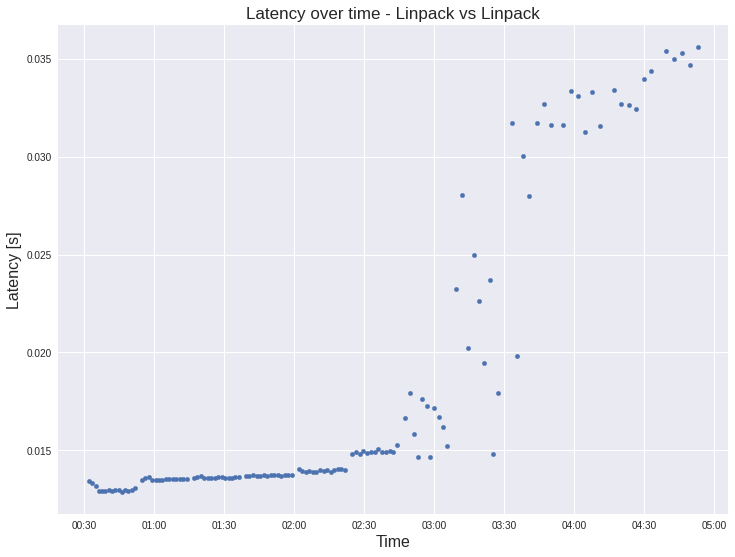

In [3]:
ax = df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.set_title('Latency over time - Linpack vs Linpack')
ax.set_ylabel('Latency [s]')
ax.set_xlabel('Time')
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [4]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

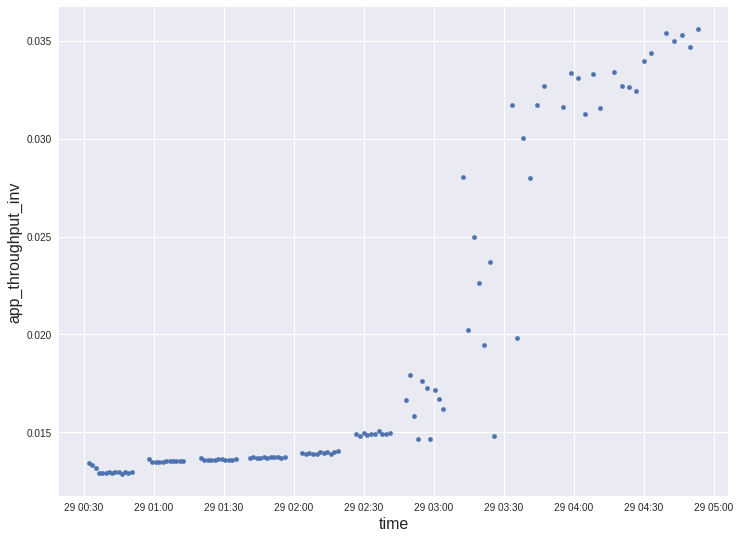

In [5]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

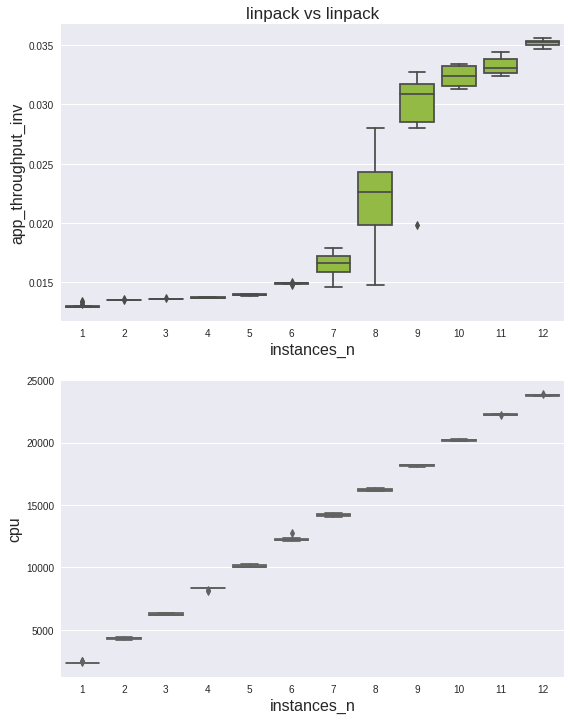

In [6]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

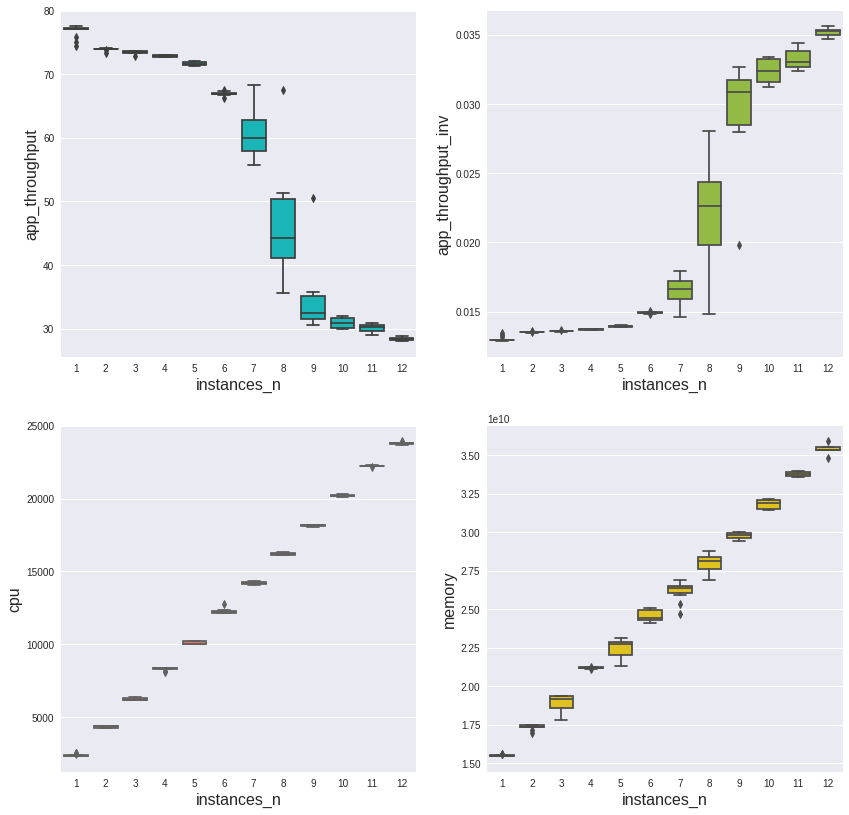

In [7]:
boxplot_grid(
    var_names=[['app_throughput', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - trimmed

In [8]:
trim=5
df = trim_experiment(df, trim)

In [9]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     306.9
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           2.18e-24
Time:                        23:14:10   Log-Likelihood:                 436.60
No. Observations:                  58   AIC:                            -869.2
Df Residuals:                      56   BIC:                            -865.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0129   3.89e-05    332.038      

#### Pvalues

In [10]:
results.pvalues

Intercept      6.061368e-94
instances_n    2.176039e-24
dtype: float64

In [11]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 0.000211


In [12]:
# for table in results.summary().tables:
#     print(table.as_latex_tabular())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


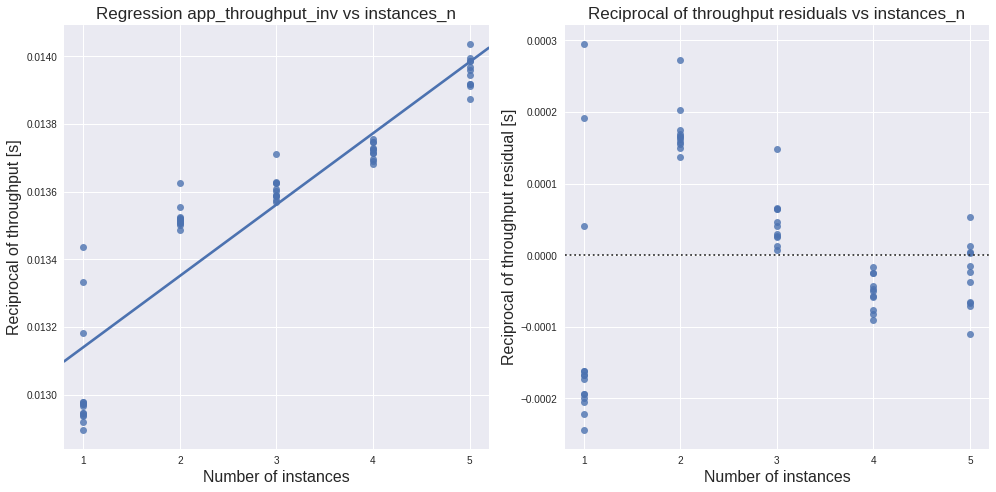

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,6))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,6))

# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')
plt.tight_layout()
plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.eps', format='eps')

#### Regression - CPU

In [14]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     311.8
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.48e-24
Time:                        23:14:11   Log-Likelihood:                 436.99
No. Observations:                  58   AIC:                            -870.0
Df Residuals:                      56   BIC:                            -865.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0129   4.11e-05    313.132      0.0

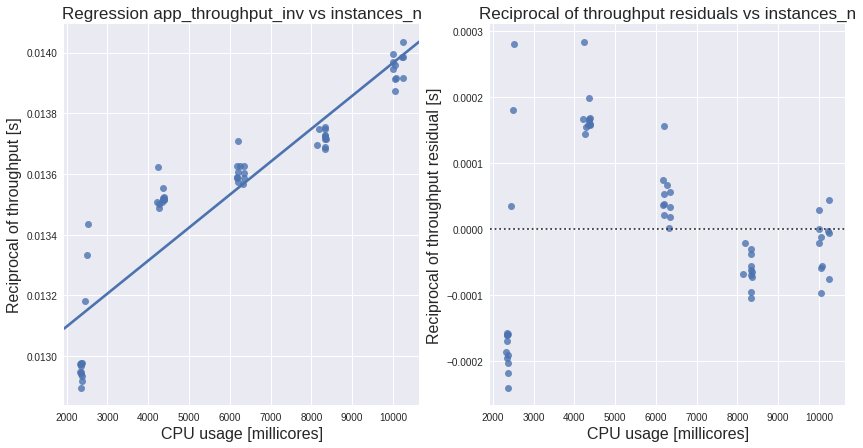

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='cpu', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xlabel(f'CPU usage [millicores]')

sns.residplot(x='cpu', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xlabel(f'CPU usage [millicores]')
pass

# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - Memory

In [16]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     254.8
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.68e-22
Time:                        23:14:11   Log-Likelihood:                 432.11
No. Observations:                  58   AIC:                            -860.2
Df Residuals:                      56   BIC:                            -856.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0114      0.000     82.346      0.0

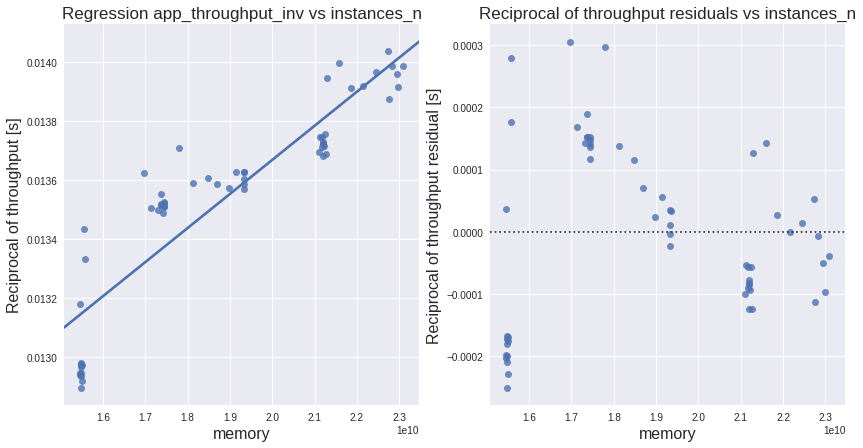

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='memory', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')

sns.residplot(x='memory', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
pass

# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

In [18]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.01e-23
Time:                        23:14:11   Log-Likelihood:                 437.09
No. Observations:                  58   AIC:                            -868.2
Df Residuals:                      55   BIC:                            -862.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0128   9.79e-05    131.151      

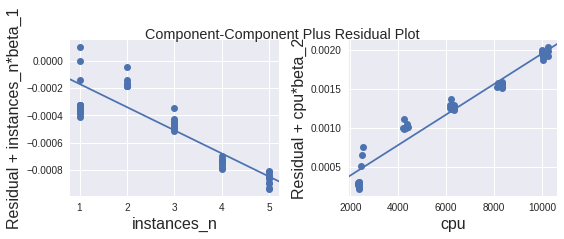

In [19]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [20]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.54e-22
Time:                        23:14:12   Log-Likelihood:                 438.18
No. Observations:                  58   AIC:                            -868.4
Df Residuals:                      54   BIC:                            -860.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0139      0.001     19.105      

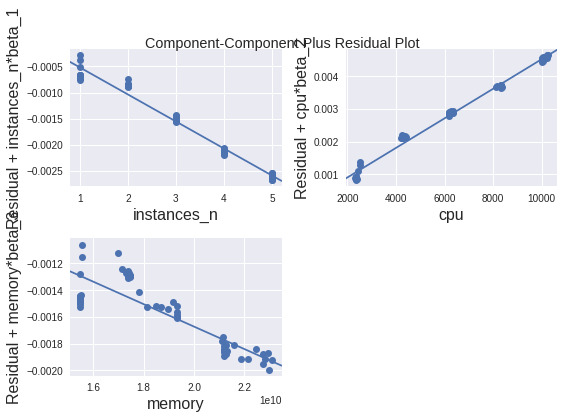

In [21]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Linpack vs Redis YCSB

In [22]:
instances_n=12
experiment_name='linpack_1_redis_ycsb_11'
workload_a = 'linpack'
workload_b = 'redis_ycsb'
perf_metric = 'app_throughput_inv'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

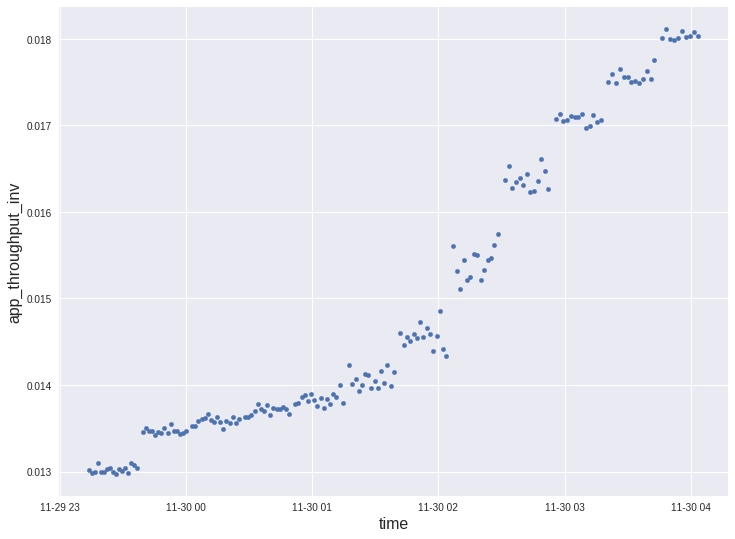

In [23]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [24]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

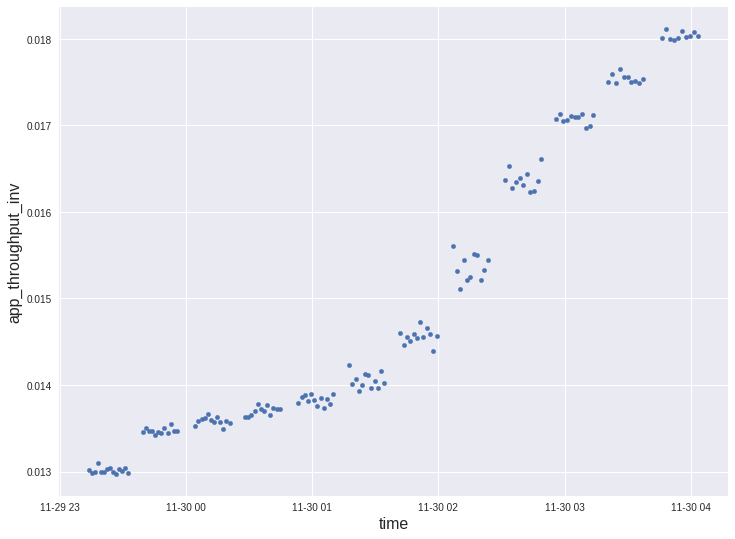

In [25]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

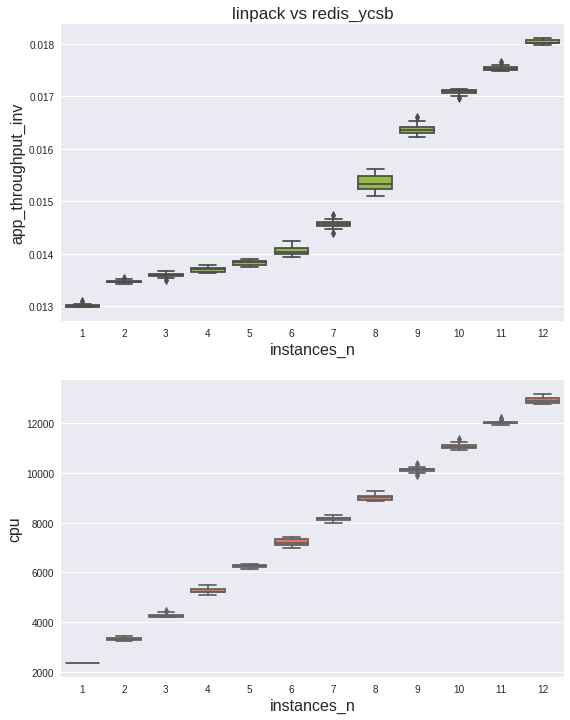

In [26]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

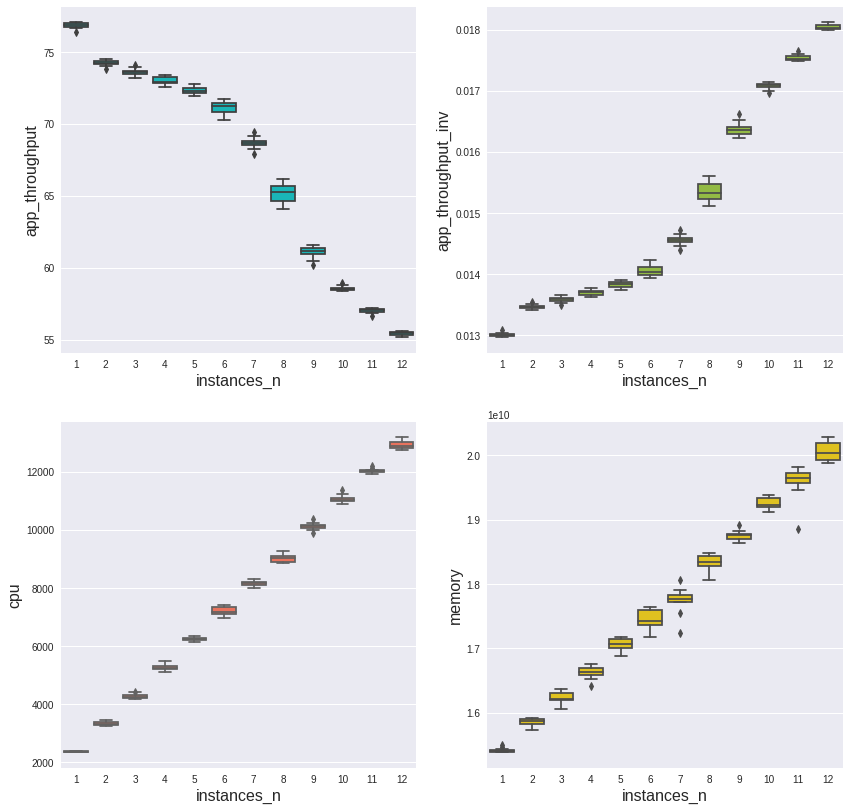

In [27]:
boxplot_grid(
    var_names=[['app_throughput', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [28]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1501.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.09e-75
Time:                        23:14:16   Log-Likelihood:                 864.85
No. Observations:                 139   AIC:                            -1726.
Df Residuals:                     137   BIC:                            -1720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0120   8.49e-05    141.881      

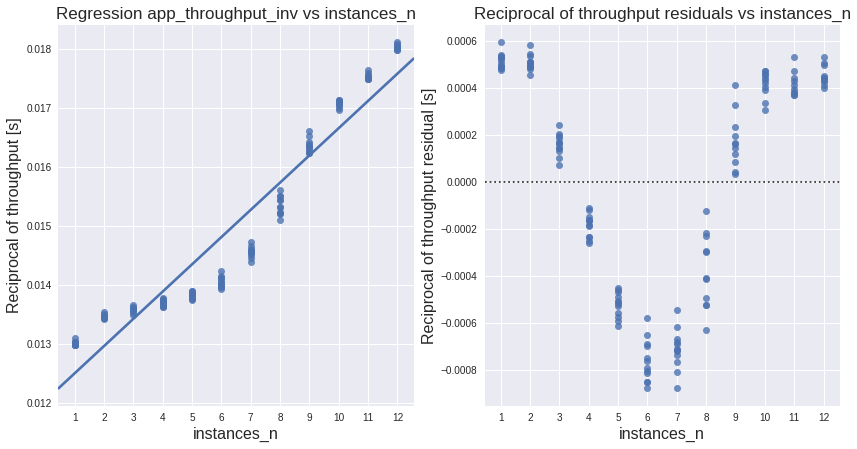

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xticks(range(1,13))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xticks(range(1,13))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

### Regression - trimmed

In [30]:
trim=6
df = trim_experiment(df, trim)

In [31]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     708.2
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           5.45e-39
Time:                        23:14:16   Log-Likelihood:                 574.67
No. Observations:                  74   AIC:                            -1145.
Df Residuals:                      72   BIC:                            -1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0130   2.68e-05    482.893      

In [32]:
# for table in results.summary().tables:
#     print(table.as_latex_tabular())

#### Pvalues

In [33]:
results.pvalues

Intercept      3.923556e-128
instances_n     5.445070e-39
dtype: float64

In [34]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 0.000186


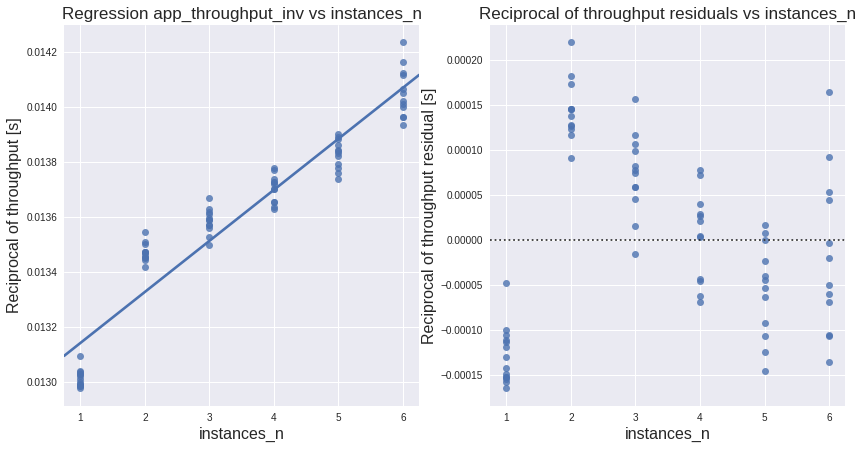

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xticks(range(1,7))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xticks(range(1,7))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [36]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     670.6
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.24e-38
Time:                        23:14:16   Log-Likelihood:                 572.85
No. Observations:                  74   AIC:                            -1142.
Df Residuals:                      72   BIC:                            -1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0127   3.69e-05    343.815      0.0

Text(0.5, 1.0, 'app_throughput_inv vs cpu')

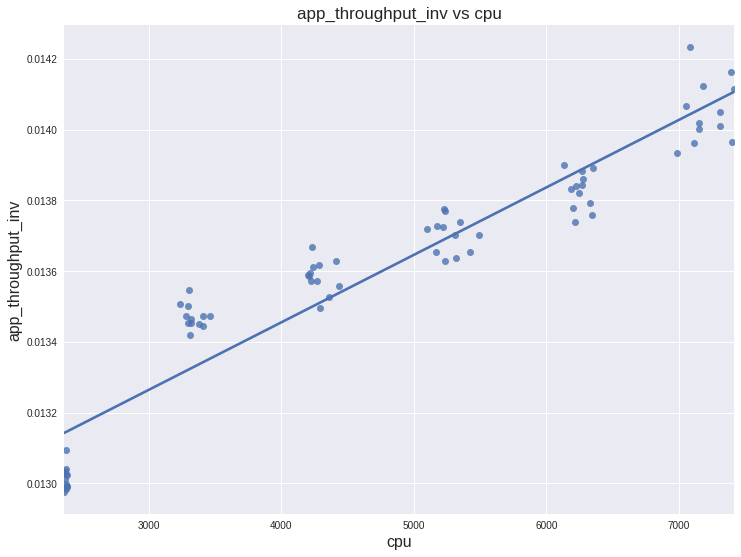

In [37]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

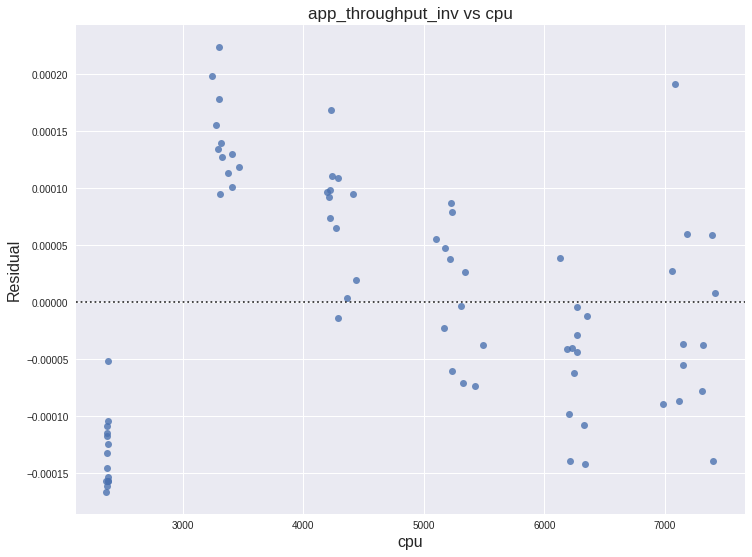

In [38]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [39]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     611.1
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           6.56e-37
Time:                        23:14:17   Log-Likelihood:                 569.76
No. Observations:                  74   AIC:                            -1136.
Df Residuals:                      72   BIC:                            -1131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0062      0.000     20.632      0.0

Text(0.5, 1.0, 'app_throughput_inv vs memory')

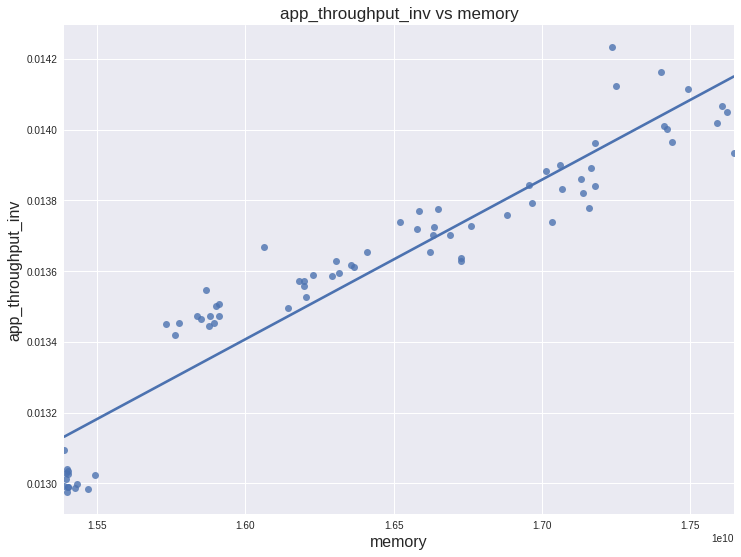

In [40]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

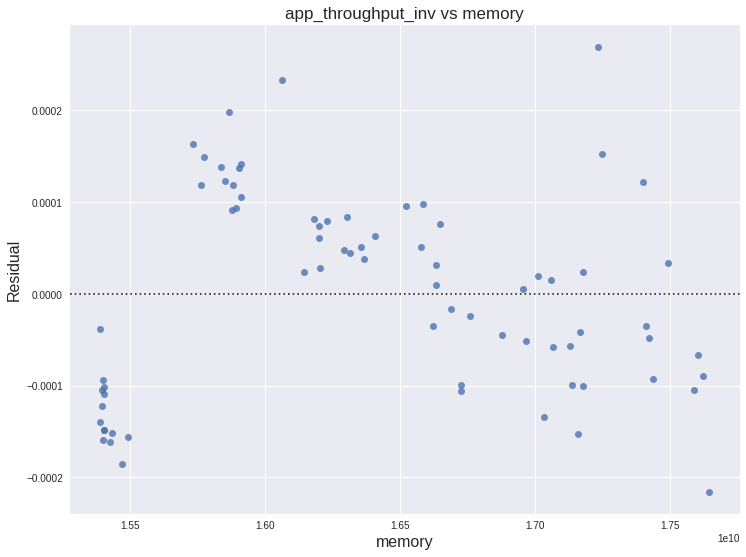

In [41]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [42]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     351.4
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.49e-37
Time:                        23:14:17   Log-Likelihood:                 574.89
No. Observations:                  74   AIC:                            -1144.
Df Residuals:                      71   BIC:                            -1137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0131      0.000     66.536      

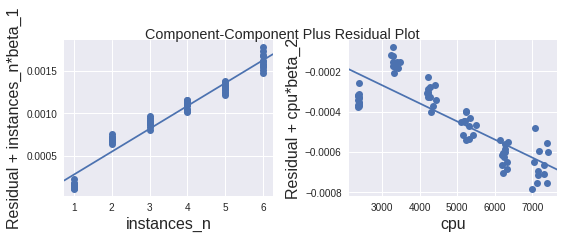

In [43]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [44]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     231.2
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.05e-36
Time:                        23:14:18   Log-Likelihood:                 574.92
No. Observations:                  74   AIC:                            -1142.
Df Residuals:                      70   BIC:                            -1133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0126      0.002      6.309      

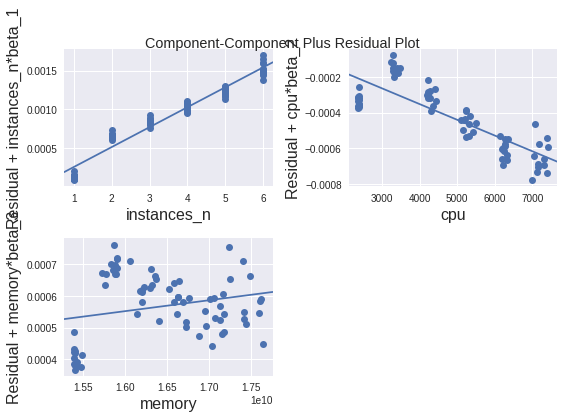

In [45]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Linpack vs Sysbench

In [46]:
instances_n=12
experiment_name='linpack_1_sysbench_11'
workload_a = 'linpack'
workload_b = 'sysbench'
perf_metric = 'app_throughput_inv'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

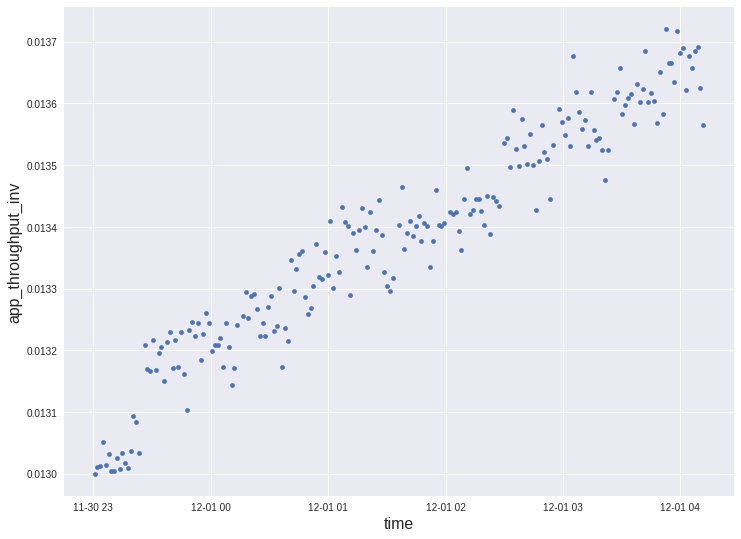

In [47]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [48]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

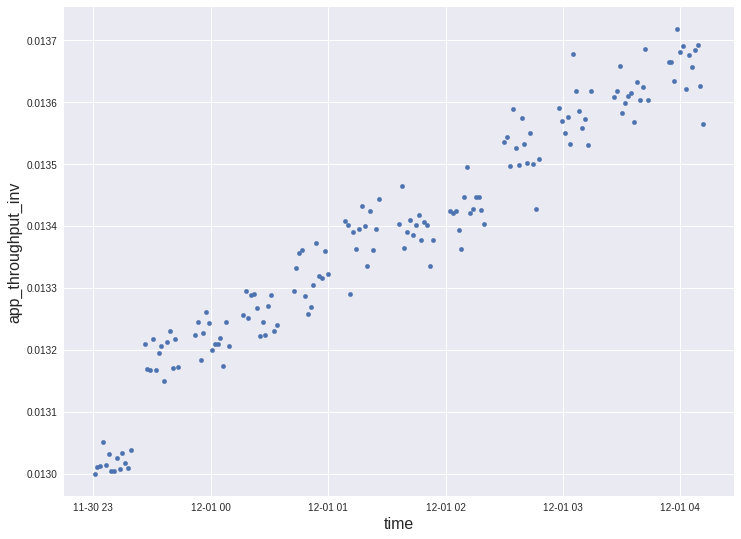

In [49]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

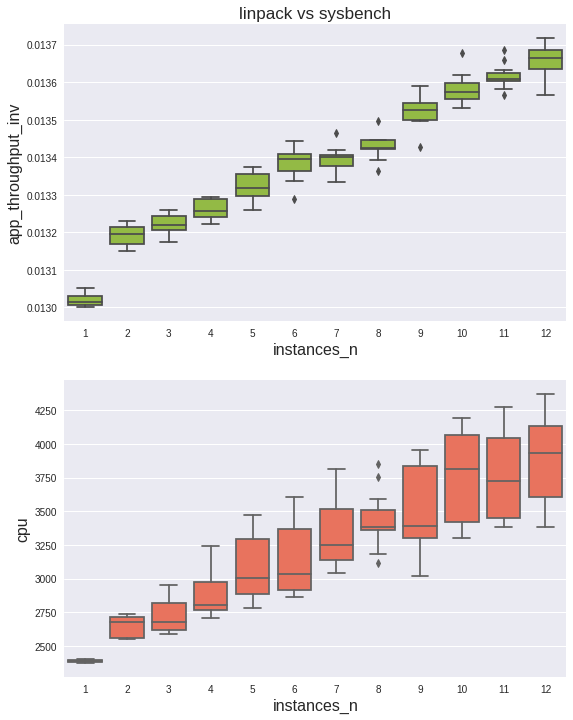

In [50]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

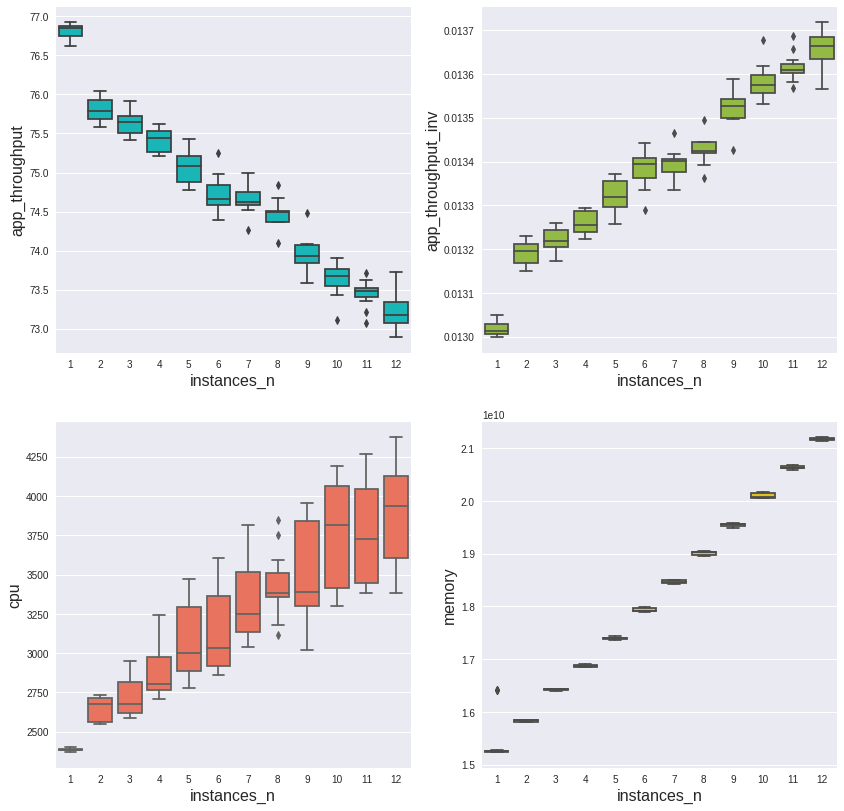

In [51]:
boxplot_grid(
    var_names=[['app_throughput', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [52]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2629.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.08e-98
Time:                        23:14:22   Log-Likelihood:                 1342.3
No. Observations:                 156   AIC:                            -2681.
Df Residuals:                     154   BIC:                            -2675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0130   7.54e-06   1729.781      

#### Pvalues

In [53]:
results.pvalues

Intercept      0.000000e+00
instances_n    1.075572e-98
dtype: float64

In [54]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 0.000053


In [55]:
# for table in results.summary().tables:
#     print(table.as_latex_tabular())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


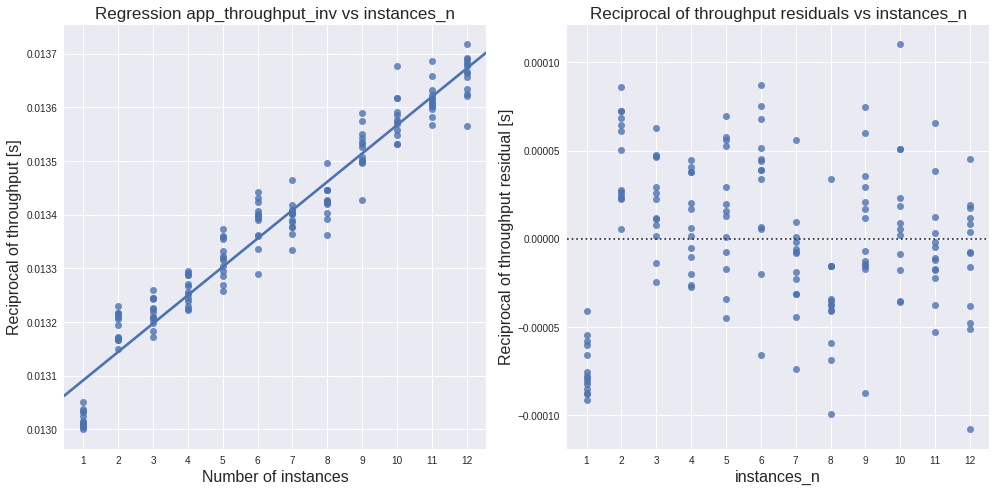

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,13))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax1.set_xlabel('Number of instances')
ax2.set_xticks(range(1,13))

# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')
plt.tight_layout()
plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.eps', format='eps')

#### Regression - CPU

In [57]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     538.9
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.70e-52
Time:                        23:14:22   Log-Likelihood:                 1233.9
No. Observations:                 156   AIC:                            -2464.
Df Residuals:                     154   BIC:                            -2458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0124   4.48e-05    275.675      0.0

Text(0.5, 1.0, 'app_throughput_inv vs cpu')

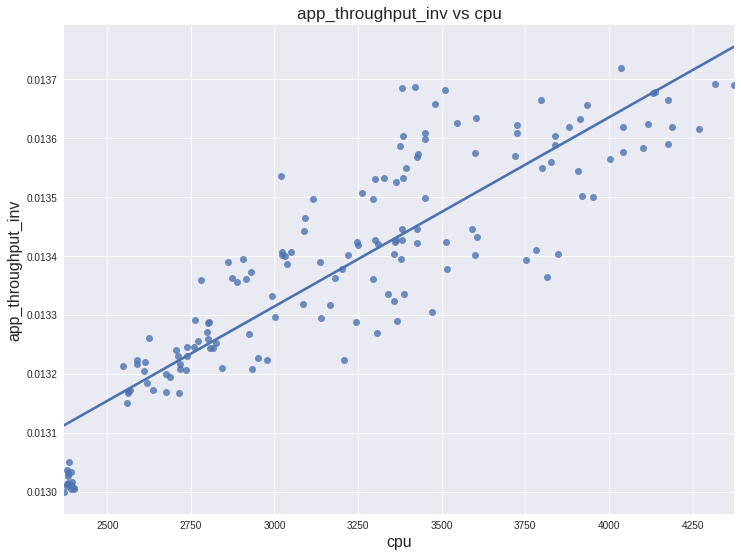

In [58]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

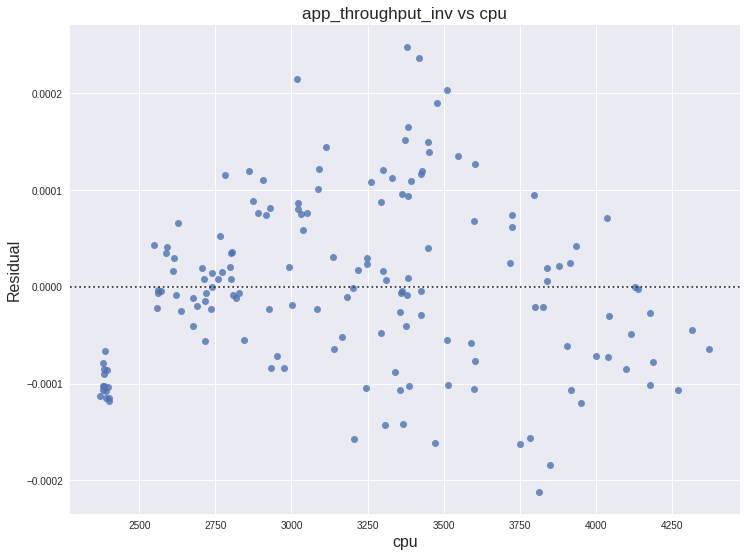

In [59]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [60]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2004.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.51e-90
Time:                        23:14:23   Log-Likelihood:                 1322.5
No. Observations:                 156   AIC:                            -2641.
Df Residuals:                     154   BIC:                            -2635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116   4.07e-05    284.161      0.0

Text(0.5, 1.0, 'app_throughput_inv vs memory')

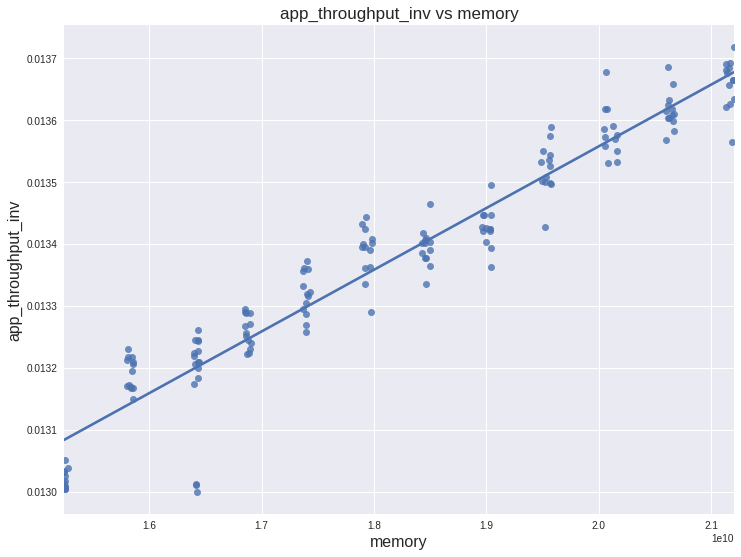

In [61]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

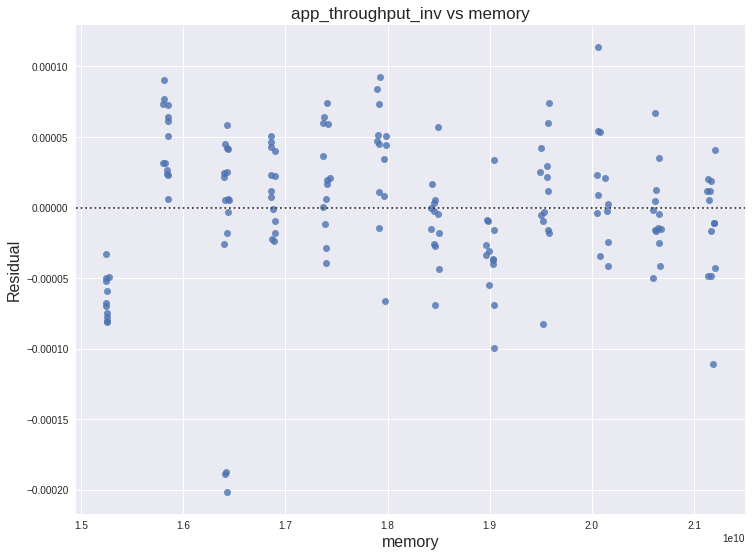

In [62]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [63]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1338.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.22e-97
Time:                        23:14:23   Log-Likelihood:                 1344.1
No. Observations:                 156   AIC:                            -2682.
Df Residuals:                     153   BIC:                            -2673.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0130   3.61e-05    359.677      

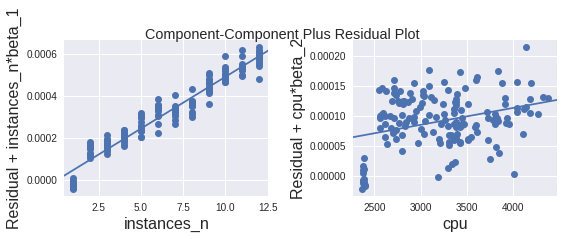

In [64]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [65]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     937.1
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           8.87e-98
Time:                        23:14:24   Log-Likelihood:                 1348.2
No. Observations:                 156   AIC:                            -2688.
Df Residuals:                     152   BIC:                            -2676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0139      0.000     41.839      

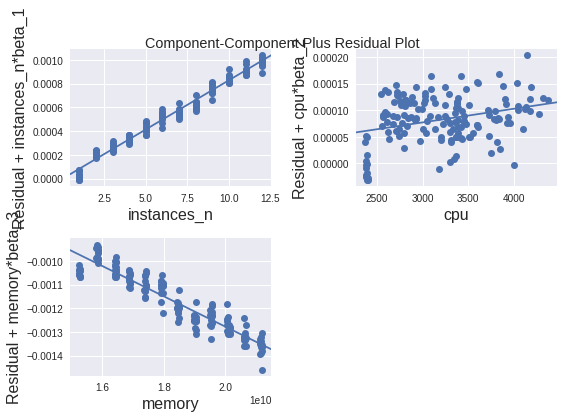

In [66]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Linpack vs Hadoop

In [67]:
instances_n=8
experiment_name='linpack_1_hadoop_pagerank_7'
workload_a = 'linpack'
workload_b = 'hadoop'
perf_metric = 'app_throughput_inv'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

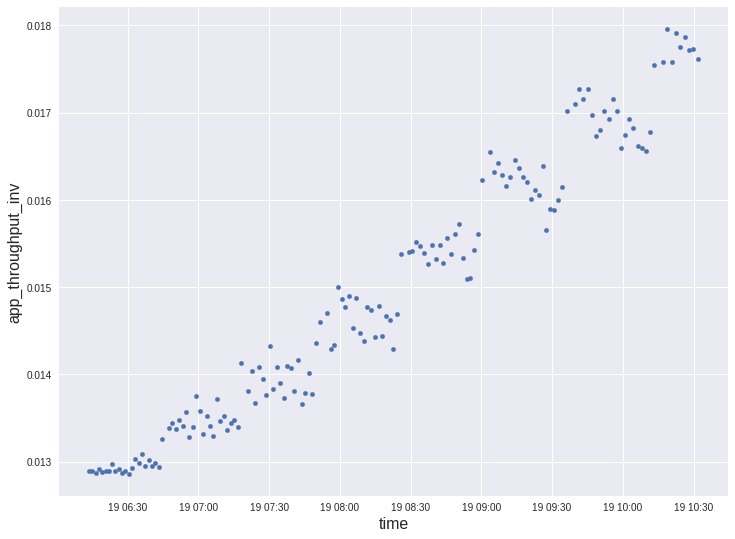

In [68]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [69]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_throughput_inv'>

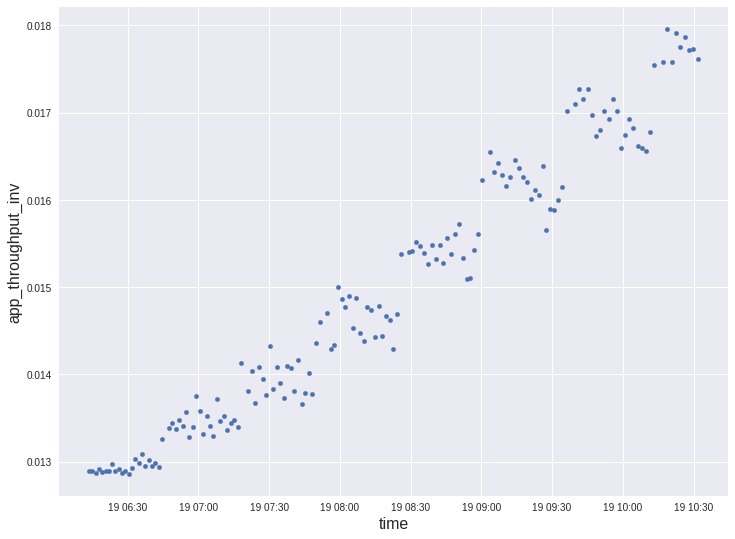

In [70]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

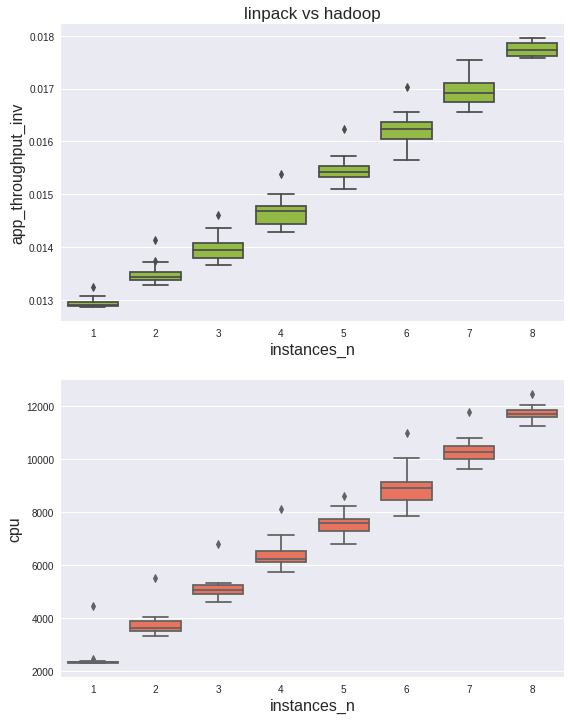

In [71]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

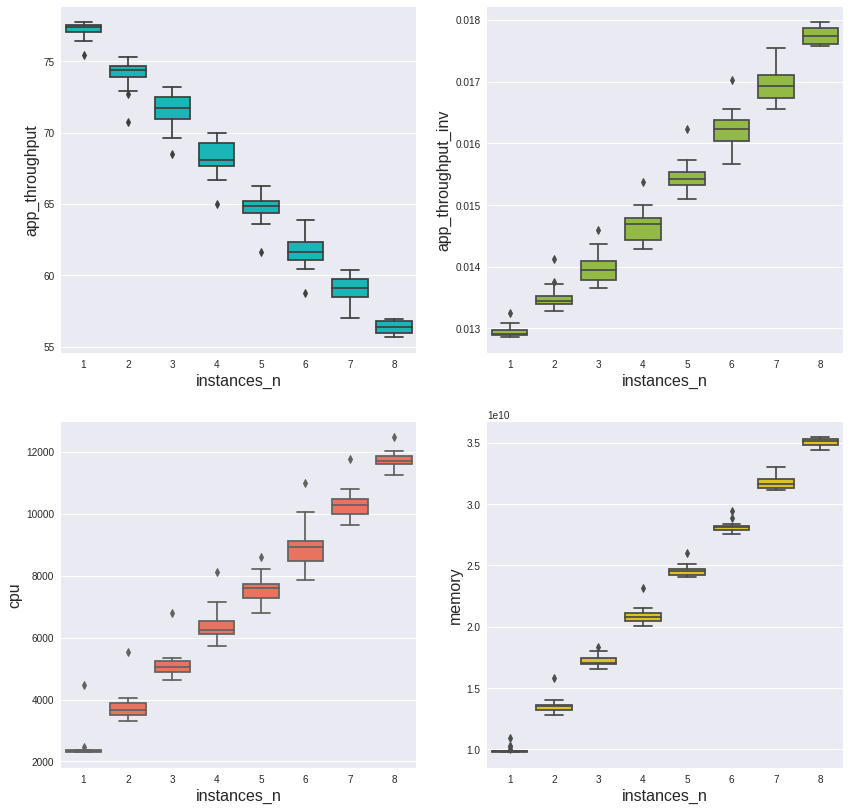

In [72]:
boxplot_grid(
    var_names=[['app_throughput', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [73]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5310.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.93e-121
Time:                        23:14:27   Log-Likelihood:                 1070.6
No. Observations:                 156   AIC:                            -2137.
Df Residuals:                     154   BIC:                            -2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0121   4.39e-05    275.544      

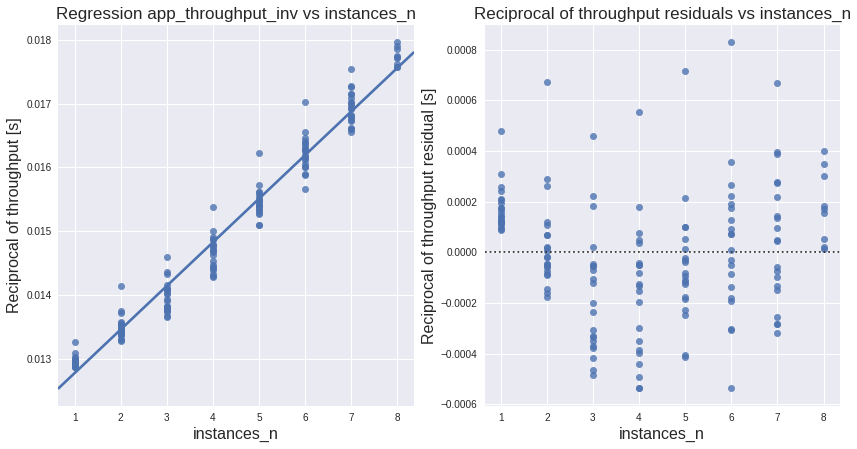

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xticks(range(1,9))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xticks(range(1,9))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

### Regression - trimmed

In [75]:
trim=5
df = trim_experiment(df, trim)

In [76]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1568.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           6.02e-65
Time:                        23:14:27   Log-Likelihood:                 746.42
No. Observations:                 107   AIC:                            -1489.
Df Residuals:                     105   BIC:                            -1483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0123   5.08e-05    241.474      

In [77]:
# for table in results.summary().tables:
#     print(table.as_latex_tabular())

#### Pvalues

In [78]:
results.pvalues

Intercept      5.763592e-146
instances_n     6.017368e-65
dtype: float64

In [79]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 0.000617


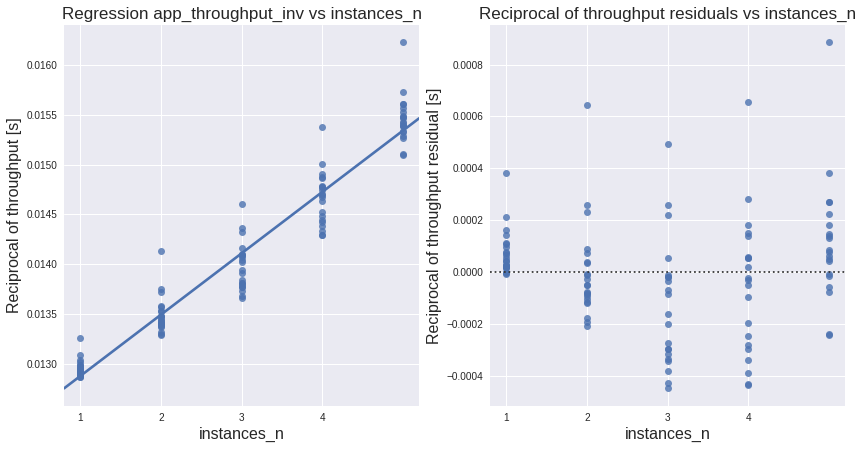

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False, ci=None)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Reciprocal of throughput [s]')
ax1.set_xticks(range(1,5))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Reciprocal of throughput residuals vs instances_n')
ax2.set_ylabel(f'Reciprocal of throughput residual [s]')
ax2.set_xticks(range(1,5))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [81]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1852.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.61e-68
Time:                        23:14:28   Log-Likelihood:                 754.80
No. Observations:                 107   AIC:                            -1506.
Df Residuals:                     105   BIC:                            -1500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0117   5.76e-05    203.879      0.0

Text(0.5, 1.0, 'app_throughput_inv vs cpu')

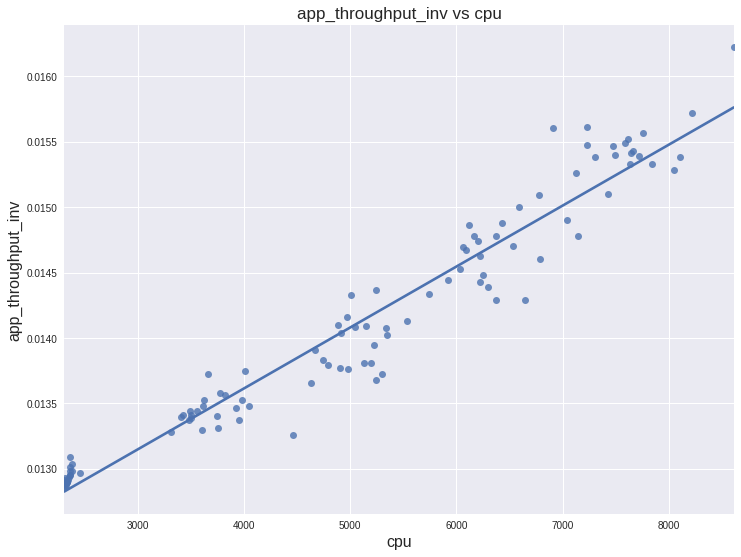

In [82]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

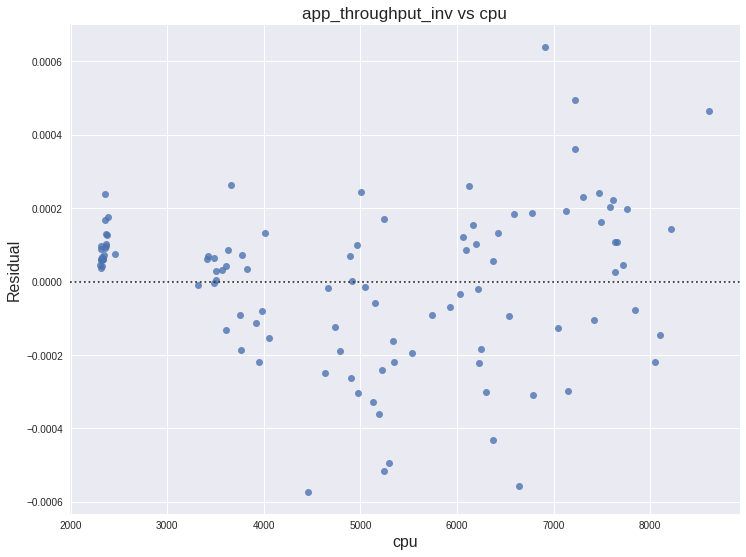

In [83]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [84]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2400.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.77e-74
Time:                        23:14:28   Log-Likelihood:                 768.00
No. Observations:                 107   AIC:                            -1532.
Df Residuals:                     105   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0112   6.14e-05    182.301      0.0

Text(0.5, 1.0, 'app_throughput_inv vs memory')

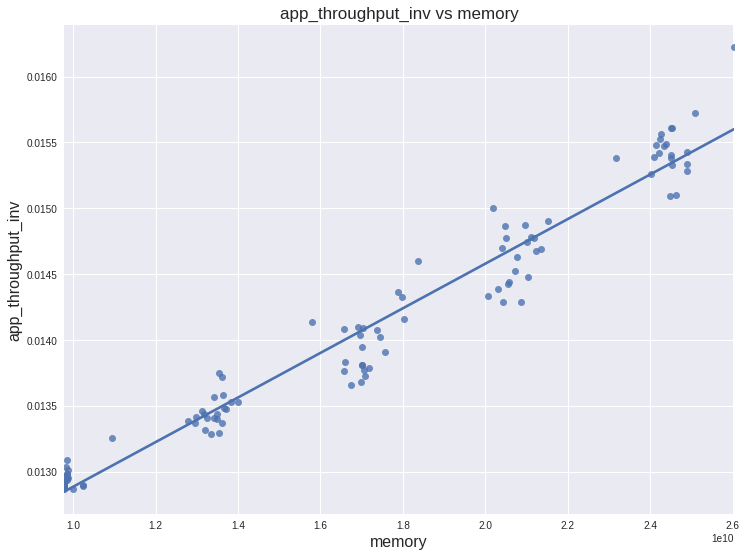

In [85]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df, ci=None)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

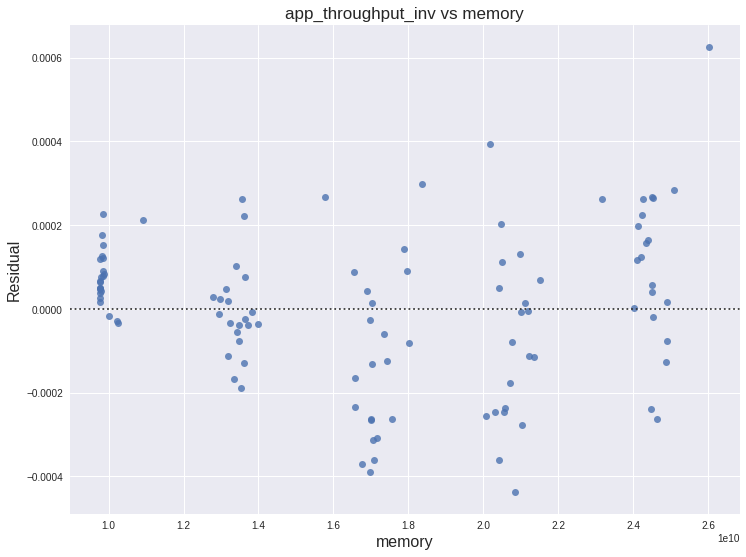

In [86]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [87]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1126.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.35e-71
Time:                        23:14:29   Log-Likelihood:                 765.26
No. Observations:                 107   AIC:                            -1525.
Df Residuals:                     104   BIC:                            -1516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0119   6.52e-05    183.070      

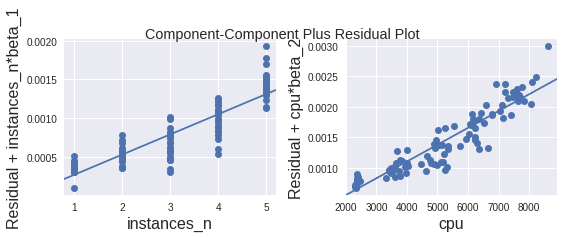

In [88]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [89]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     916.1
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           4.28e-74
Time:                        23:14:29   Log-Likelihood:                 775.96
No. Observations:                 107   AIC:                            -1544.
Df Residuals:                     103   BIC:                            -1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0107      0.000     42.020      

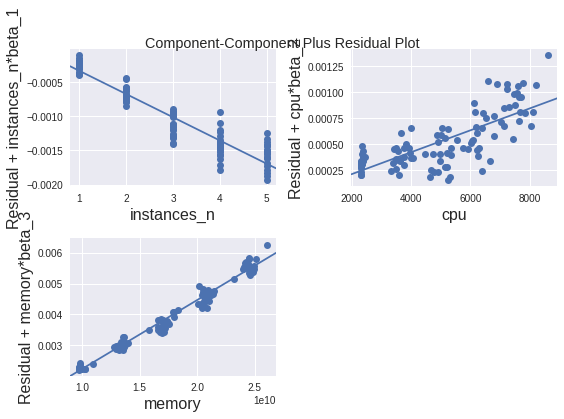

In [90]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)